In [25]:

import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [12]:
df_borrower = pd.read_csv("../dataset/Borrower.txt", sep="\t")
df_loan=pd.read_csv("../dataset/Loan.txt",sep='\t')
df_borrower_prod = pd.read_csv("../dataset/Borrower_Prod.txt", sep="\t")
df_loan_prod=pd.read_csv("../dataset/Loan_Prod.txt",sep='\t')

In [13]:
df_borrower

,memberId,residentialState,yearsEmployment,homeOwnership,annualIncome,incomeVerified,dtiRatio,lengthCreditHistory,numTotalCreditLines,numOpenCreditLines,numOpenCreditLines1Year,revolvingBalance,revolvingUtilizationRate,numDerogatoryRec,numDelinquency2Years,numChargeoff1year,numInquiries6Mon
0,2305095,NM,10+ years,rent,56471,1,16.80,6,11,9.0,6,14301,49.02,0,19,10,0
1,2610493,WA,2-5 years,rent,55038,0,19.99,22,8,7.0,4,18262,72.40,1,0,0,0
2,2491679,MS,< 1 year,rent,56610,1,14.33,5,8,5.0,5,10799,66.27,0,1,1,0
3,2092798,TX,6-9 years,own,54887,1,14.80,12,14,7.0,3,15272,61.05,1,0,0,3
4,2633077,MA,2-5 years,rent,53522,1,10.14,4,21,19.0,10,19316,56.39,2,14,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2069462,LA,2-5 years,own,58987,0,21.62,2,16,10.0,8,15113,77.01,0,6,5,18
99996,2218175,MO,6-9 years,rent,54245,1,15.60,11,11,7.0,4,13504,80.18,0,0,0,1
99997,2262127,DE,1 year,rent,54923,0,13.96,2,21,13.0,10,18108,77.28,0,0,0,1
99998,2501174,CA,1 year,own,57809,1,9.07,36,18,12.0,4,17918,61.01,10,0,0,1


In [14]:
df_loan

,loanId,memberId,date,purpose,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,loanStatus
0,1888978,2305095,12/10/2014,debtconsolidation,0.0,25190.0,60 months,6.25,490,E3,Current
1,1299695,2610493,9/15/2014,debtconsolidation,0.0,21189.0,60 months,10.49,455,B3,Current
2,1875016,2491679,9/11/2014,debtconsolidation,0.0,29908.0,60 months,9.11,622,B2,Current
3,1440478,2092798,4/22/2016,homeimprovement,0.0,13053.0,48 months,11.89,343,B3,Current
4,1124634,2633077,2/3/2016,debtconsolidation,0.0,24613.0,60 months,15.13,587,A3,Current
...,...,...,...,...,...,...,...,...,...,...,...
99995,1208167,2069462,5/25/2016,debtconsolidation,0.0,25874.0,60 months,10.95,562,A2,Current
99996,1097349,2218175,6/5/2015,debtconsolidation,0.0,18557.0,60 months,5.31,353,A1,Current
99997,1873914,2262127,11/13/2014,debtconsolidation,0.0,15877.0,36 months,9.87,511,A2,Current
99998,1572282,2501174,6/6/2015,debtconsolidation,0.0,15601.0,60 months,7.31,311,C3,Current


In [15]:
df_borrower_prod

,memberId,residentialState,yearsEmployment,homeOwnership,annualIncome,incomeVerified,dtiRatio,lengthCreditHistory,numTotalCreditLines,numOpenCreditLines,numOpenCreditLines1Year,revolvingBalance,revolvingUtilizationRate,numDerogatoryRec,numDelinquency2Years,numChargeoff1year,numInquiries6Mon
0,16334480,IL,6-9 years,mortgage,50975,0,17.71,1,11,9,5,15868,83.01,0,9,5,10
1,16334481,TN,2-5 years,own,51887,1,23.84,5,19,16,12,12709,65.63,0,0,0,1
2,16334482,PA,10+ years,mortgage,53254,1,22.53,2,22,19,12,16928,78.35,0,0,0,1
3,16334483,TX,1 year,own,59643,1,15.26,6,13,7,6,17301,61.74,0,0,0,0
4,16334484,CA,< 1 year,mortgage,60630,1,9.67,4,16,15,10,16655,64.82,0,0,0,0
5,16334485,NY,10+ years,rent,49207,1,18.09,7,16,16,14,15089,62.79,0,0,0,8
6,16334486,CA,< 1 year,rent,54070,1,21.47,3,19,11,4,15801,70.65,0,0,0,2
7,16334487,MD,< 1 year,rent,53539,1,24.42,38,18,13,8,14789,74.11,0,0,0,0
8,16334488,KY,10+ years,own,52252,0,13.04,5,25,22,16,11624,96.96,4,0,0,3
9,16334489,DC,< 1 year,mortgage,50263,0,15.75,6,18,13,7,11572,44.55,0,0,0,0


In [16]:
df_loan_prod

,loanId,memberId,date,purpose,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,loanStatus
0,10000000,16334480,7/2/2016,debtconsolidation,0,23765,60 months,9.38,498.0,D1,NaN
1,10000001,16334481,7/3/2016,debtconsolidation,0,24302,60 months,6.84,479.0,C3,NaN
2,10000002,16334482,7/4/2016,debtconsolidation,0,18395,60 months,15.67,444.0,E1,NaN
3,10000003,16334483,7/5/2016,debtconsolidation,0,19621,48 months,7.48,474.0,A1,NaN
4,10000004,16334484,7/6/2016,debtconsolidation,0,20577,48 months,9.26,515.0,E3,NaN
5,10000005,16334485,7/7/2016,debtconsolidation,0,21751,60 months,6.60,427.0,C2,NaN
6,10000006,16334486,7/8/2016,debtconsolidation,0,19911,48 months,14.12,545.0,C3,NaN
7,10000007,16334487,7/9/2016,debtconsolidation,0,21274,60 months,12.86,483.0,C3,NaN
8,10000008,16334488,7/10/2016,debtconsolidation,0,25574,60 months,13.26,585.0,C2,NaN
9,10000009,16334489,7/11/2016,debtconsolidation,0,24363,48 months,13.87,664.0,C1,NaN


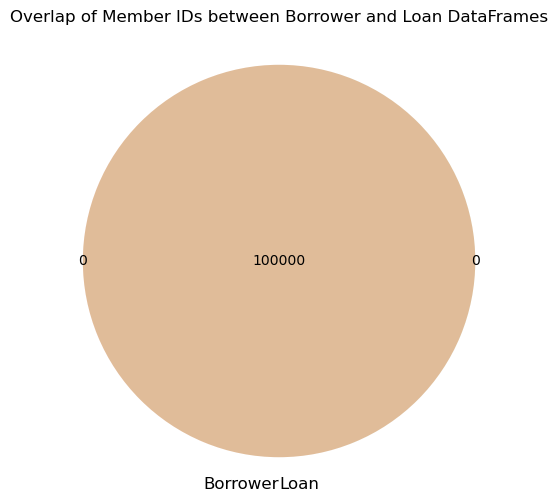

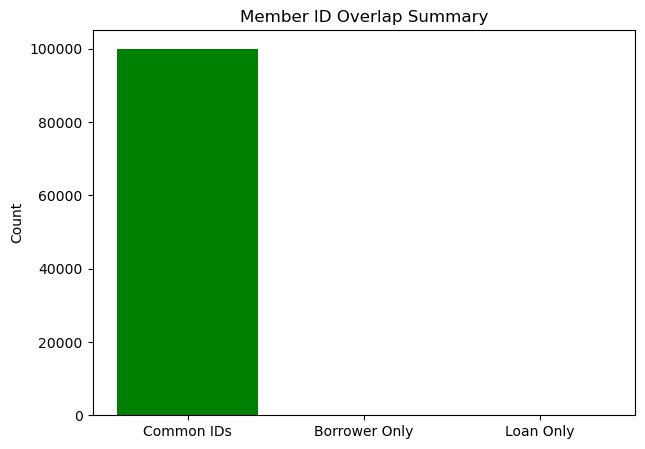

In [17]:

borrower_ids = set(df_borrower['memberId'])
loan_ids = set(df_loan['memberId'])

plt.figure(figsize=(6,6))
venn2([borrower_ids, loan_ids], set_labels=('Borrower', 'Loan'))
plt.title('Overlap of Member IDs between Borrower and Loan DataFrames')
plt.show()

counts = {
    'Common IDs': len(borrower_ids & loan_ids),
    'Borrower Only': len(borrower_ids - loan_ids),
    'Loan Only': len(loan_ids - borrower_ids)
}

plt.figure(figsize=(7,5))
plt.bar(counts.keys(), counts.values(), color=['green', 'blue', 'red'])
plt.title('Member ID Overlap Summary')
plt.ylabel('Count')
plt.show()


In [18]:
# Check for duplicate memberId in df_loan
duplicate_loan_member_ids = df_loan[df_loan.duplicated('memberId', keep=False)]

if not duplicate_loan_member_ids.empty:
    print("There are duplicate member IDs in the df_loan DataFrame.")
    print("Here are the rows with duplicate member IDs:")
    display(duplicate_loan_member_ids.sort_values(by='memberId'))
else:
    print("There are no duplicate member IDs in the df_loan DataFrame.")

There are no duplicate member IDs in the df_loan DataFrame.


In [19]:
# Check for duplicate memberId in df_borrower
duplicate_borrower_member_ids = df_borrower[df_borrower.duplicated('memberId', keep=False)]

if not duplicate_borrower_member_ids.empty:
    print("There are duplicate member IDs in the df_borrower DataFrame.")
    print("Here are the rows with duplicate member IDs:")
    display(duplicate_borrower_member_ids.sort_values(by='memberId'))
else:
    print("There are no duplicate member IDs in the df_borrower DataFrame.")

There are no duplicate member IDs in the df_borrower DataFrame.


In [20]:

import matplotlib.pyplot as plt
import pandas as pd

# Check for common and unique memberIds
common_borrower_prod_ids = set(df_borrower['memberId']).intersection(set(df_borrower_prod['memberId']))
borrower_only_ids = set(df_borrower['memberId']) - set(df_borrower_prod['memberId'])
borrower_prod_only_ids = set(df_borrower_prod['memberId']) - set(df_borrower['memberId'])

print(f"Number of common member IDs between df_borrower and df_borrower_prod: {len(common_borrower_prod_ids)}")
print(f"Number of member IDs only in df_borrower: {len(borrower_only_ids)}")
print(f"Number of member IDs only in df_borrower_prod: {len(borrower_prod_only_ids)}")

# Optional: Display some of the unique IDs if the number is small
if len(borrower_only_ids) < 20:
    print("\nSample member IDs only in df_borrower:", list(borrower_only_ids)[:5])
if len(borrower_prod_only_ids) < 20:
    print("Sample member IDs only in df_borrower_prod:", list(borrower_prod_only_ids)[:5])

# You can also check if the columns are the same
if list(df_borrower.columns) == list(df_borrower_prod.columns):
    print("\nColumns in df_borrower and df_borrower_prod are the same.")
else:
    print("\nColumns in df_borrower and df_borrower_prod are different.")
    print("Columns in df_borrower:", df_borrower.columns.tolist())
    print("Columns in df_borrower_prod:", df_borrower_prod.columns.tolist())

Number of common member IDs between df_borrower and df_borrower_prod: 0
Number of member IDs only in df_borrower: 100000
Number of member IDs only in df_borrower_prod: 22

Columns in df_borrower and df_borrower_prod are the same.


In [21]:
# Check for common columns between df_loan and df_borrower
common_columns = list(set(df_loan.columns).intersection(set(df_borrower.columns)))

if common_columns:
    print("Common columns between df_loan and df_borrower:")
    print(common_columns)
else:
    print("There are no common columns between df_loan and df_borrower.")

Common columns between df_loan and df_borrower:
['memberId']


In [22]:
# Merge df_borrower and df_loan using an inner join on 'memberId'
df = pd.merge(df_borrower, df_loan, on='memberId', how='inner')

# Display the first few rows of the merged dataframe
print("Merged DataFrame (first 5 rows):")
display(df.head())

# Display information about the merged dataframe
print("\nMerged DataFrame Info:")
df.info()

# Display the shape of the merged dataframe
print("\nShape of the merged DataFrame:")
print(df.shape)

Merged DataFrame (first 5 rows):


,memberId,residentialState,yearsEmployment,homeOwnership,annualIncome,incomeVerified,dtiRatio,lengthCreditHistory,numTotalCreditLines,numOpenCreditLines,...,loanId,date,purpose,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,loanStatus
0,2305095,NM,10+ years,rent,56471,1,16.80,6,11,9.0,...,1888978,12/10/2014,debtconsolidation,0.0,25190.0,60 months,6.25,490,E3,Current
1,2610493,WA,2-5 years,rent,55038,0,19.99,22,8,7.0,...,1299695,9/15/2014,debtconsolidation,0.0,21189.0,60 months,10.49,455,B3,Current
2,2491679,MS,< 1 year,rent,56610,1,14.33,5,8,5.0,...,1875016,9/11/2014,debtconsolidation,0.0,29908.0,60 months,9.11,622,B2,Current
3,2092798,TX,6-9 years,own,54887,1,14.80,12,14,7.0,...,1440478,4/22/2016,homeimprovement,0.0,13053.0,48 months,11.89,343,B3,Current
4,2633077,MA,2-5 years,rent,53522,1,10.14,4,21,19.0,...,1124634,2/3/2016,debtconsolidation,0.0,24613.0,60 months,15.13,587,A3,Current



Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   memberId                  100000 non-null  int64  
 1   residentialState          100000 non-null  object 
 2   yearsEmployment           100000 non-null  object 
 3   homeOwnership             100000 non-null  object 
 4   annualIncome              100000 non-null  int64  
 5   incomeVerified            100000 non-null  int64  
 6   dtiRatio                  100000 non-null  float64
 7   lengthCreditHistory       100000 non-null  int64  
 8   numTotalCreditLines       100000 non-null  int64  
 9   numOpenCreditLines        99033 non-null   float64
 10  numOpenCreditLines1Year   100000 non-null  int64  
 11  revolvingBalance          100000 non-null  int64  
 12  revolvingUtilizationRate  100000 non-null  float64
 13  numDerogatoryRec     

In [23]:

# Check for missing values in each column
print("Missing values in each column:")
display(df.isnull().sum())

Missing values in each column:


memberId                       0
residentialState               0
yearsEmployment                0
homeOwnership                  0
annualIncome                   0
incomeVerified                 0
dtiRatio                       0
lengthCreditHistory            0
numTotalCreditLines            0
numOpenCreditLines           967
numOpenCreditLines1Year        0
revolvingBalance               0
revolvingUtilizationRate       0
numDerogatoryRec               0
numDelinquency2Years           0
numChargeoff1year              0
numInquiries6Mon               0
loanId                         0
date                           0
purpose                        0
isJointApplication           971
loanAmount                  1006
term                        1071
interestRate                   0
monthlyPayment                 0
grade                          0
loanStatus                     0
dtype: int64

In [24]:

# Check the unique values and their counts for each object (categorical) column
for col in df.select_dtypes(include='object').columns:
    print(f"Categories in column '{col}':")
    display(df[col].value_counts())
    print("-" * 30) # Separator for readability

Categories in column 'residentialState':


residentialState
CA    7057
FL    6603
DC    5396
NY    5161
WA    3477
TX    3432
IA    2975
IL    2913
ID    2845
IN    2800
RI    1790
NV    1771
GA    1767
KS    1755
MN    1751
SD    1745
MD    1744
MI    1741
SC    1738
LA    1732
ME    1728
NH    1725
MO    1718
MS    1709
TN    1707
MA    1694
NJ    1694
NE    1688
PA    1674
KY    1664
MT    1661
OR    1659
NM    1644
DE    1609
CT    1605
CO    1575
AR    1486
AL    1484
AZ    1467
OH     946
WV     907
NC     901
VA     874
UT     845
VT     843
OK     843
WI     833
WY     818
ND     806
Name: count, dtype: int64

------------------------------
Categories in column 'yearsEmployment':


yearsEmployment
10+ years    22389
6-9 years    19945
< 1 year     19401
1 year       19211
2-5 years    19054
Name: count, dtype: int64

------------------------------
Categories in column 'homeOwnership':


homeOwnership
mortgage    36187
rent        32797
own         31016
Name: count, dtype: int64

------------------------------
Categories in column 'date':


date
12/20/2015    162
12/15/2015    161
6/5/2015      160
4/18/2015     160
3/20/2016     160
             ... 
3/13/2016      99
1/19/2015      98
2/17/2016      97
5/14/2016      97
9/13/2015      96
Name: count, Length: 780, dtype: int64

------------------------------
Categories in column 'purpose':


purpose
debtconsolidation    81344
homeimprovement       8116
other                 4118
business              3210
healthcare            1229
education             1003
auto                   980
Name: count, dtype: int64

------------------------------
Categories in column 'term':


term
60 months    33971
48 months    32486
36 months    32472
Name: count, dtype: int64

------------------------------
Categories in column 'grade':


grade
A1    11251
A2    10574
A3    10416
B1     8553
B3     8279
B2     8014
C1     7030
C2     6826
C3     5573
D2     4513
D1     4488
D3     3917
E3     3614
E1     3530
E2     3422
Name: count, dtype: int64

------------------------------
Categories in column 'loanStatus':


loanStatus
Current    89996
Default    10004
Name: count, dtype: int64

------------------------------


C:\Users\pavan\AppData\Local\Temp\ipykernel_12700\739862772.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=col, y=df[col].map(df[col].value_counts()),


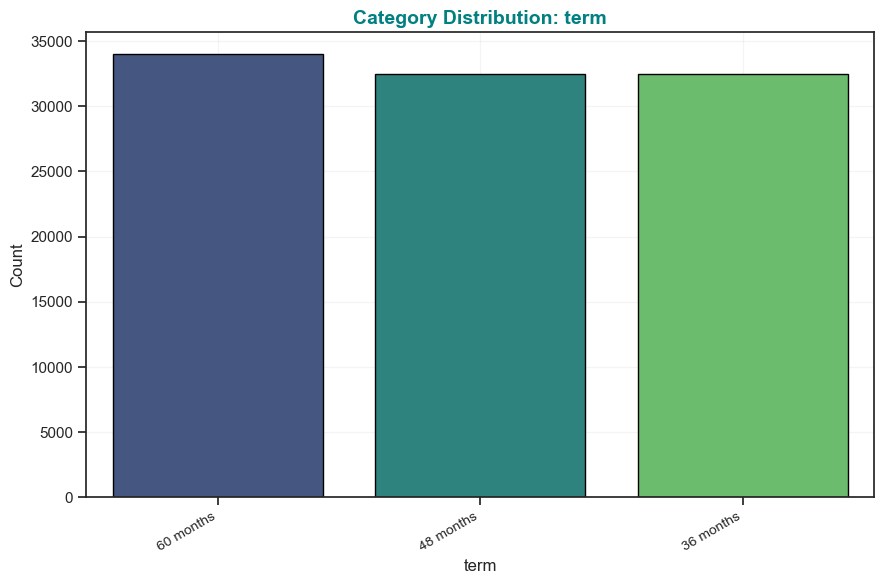

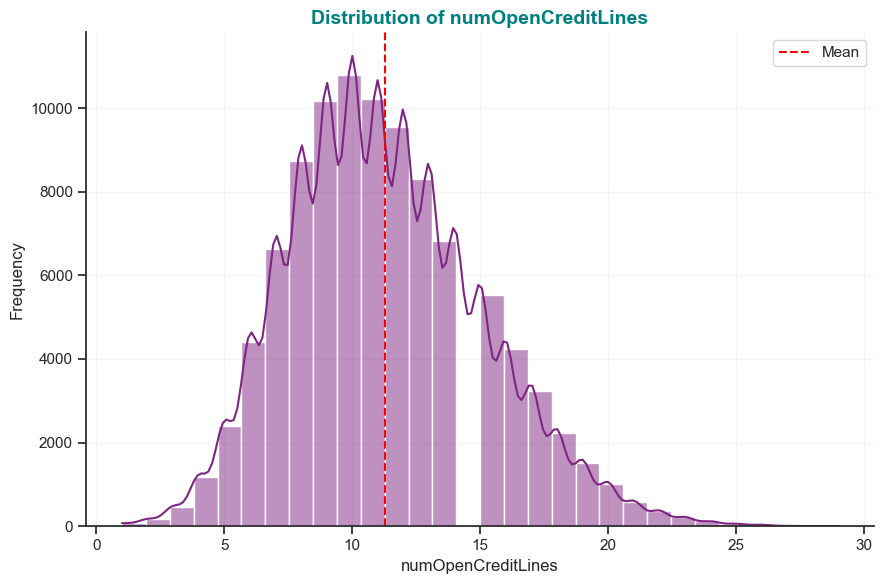

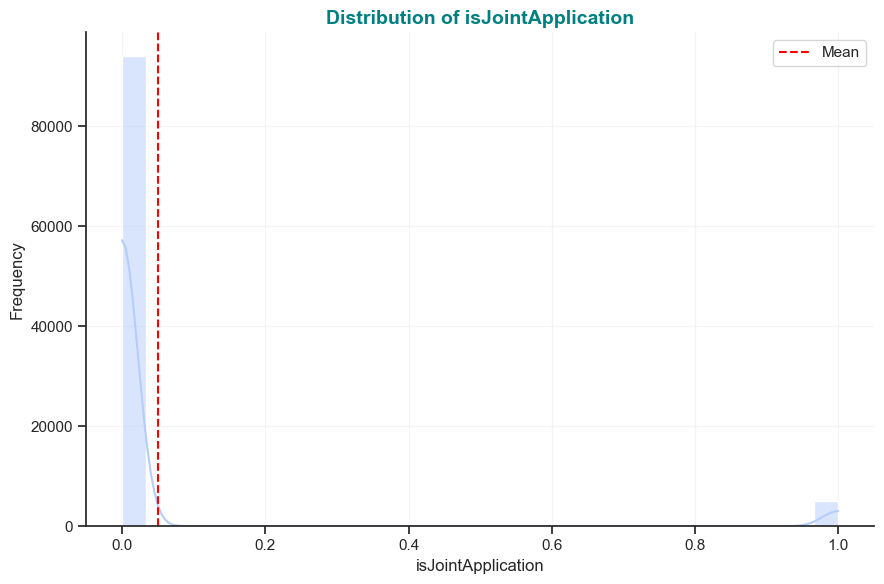

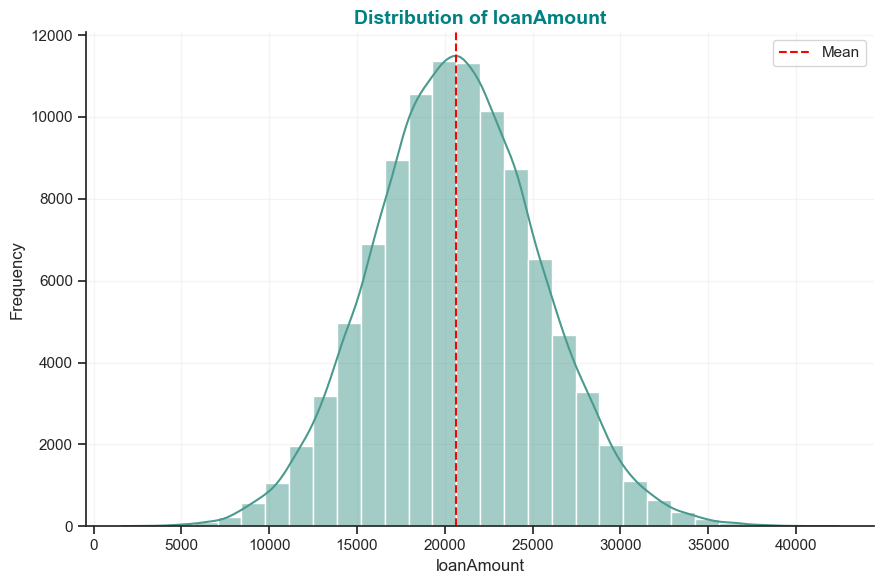

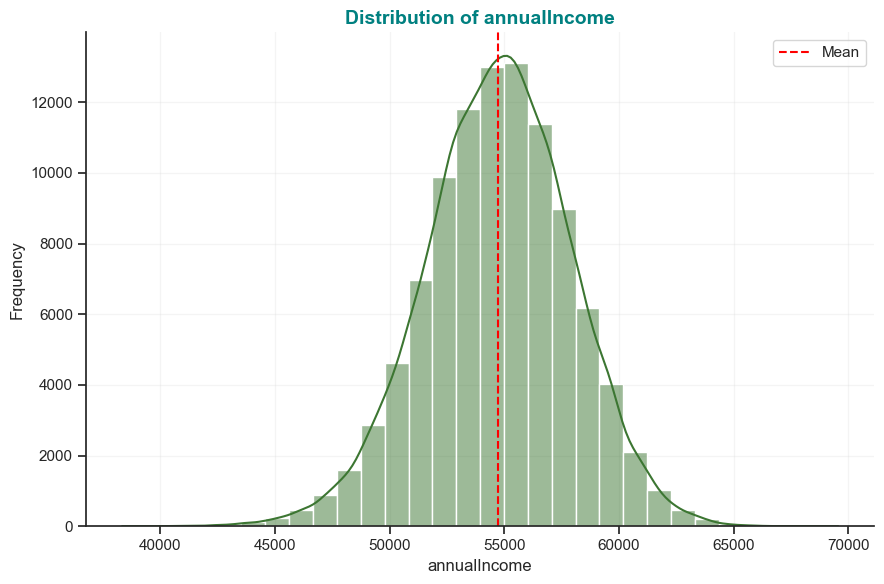

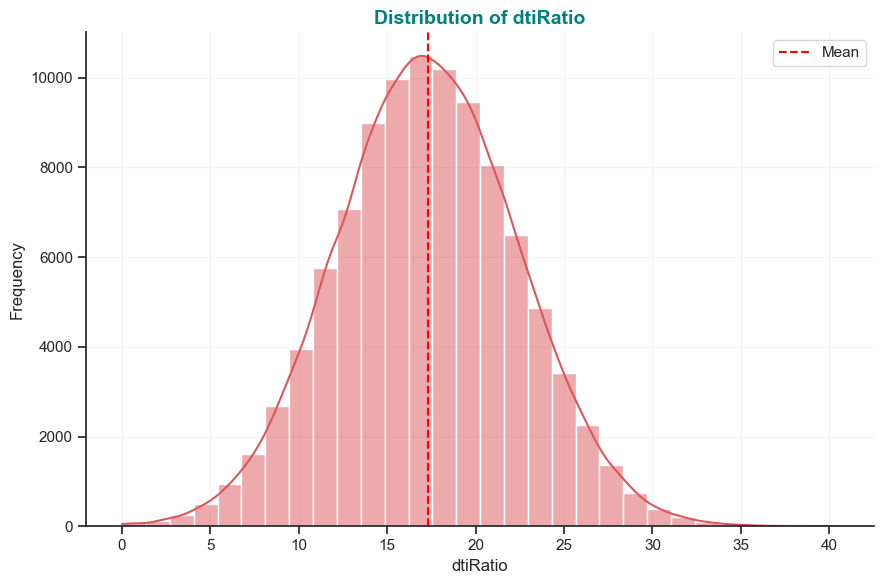

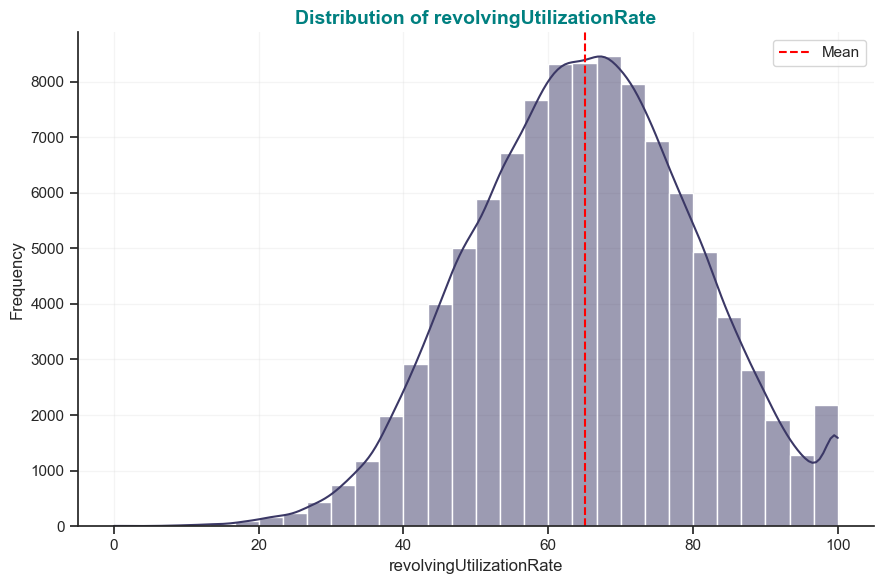

In [27]:
columns_to_visualize = ['term', 'numOpenCreditLines', 'isJointApplication', 
                        'loanAmount', 'annualIncome', 'dtiRatio', 'revolvingUtilizationRate']

# Global style settings
sns.set_theme(style="ticks", palette="viridis")

# Assign different palettes for variation
palettes = ['viridis', 'magma', 'coolwarm', 'crest', 'cubehelix', 'flare', 'icefire']

for i, col in enumerate(columns_to_visualize):
    plt.figure(figsize=(9, 6))
    palette = palettes[i % len(palettes)]
    
    if df[col].dtype in ['int64', 'float64']:
        # Use a combination of histogram and KDE with unique colors
        sns.histplot(data=df, x=col, kde=True, bins=30, color=sns.color_palette(palette, 10)[3])
        sns.despine()
        plt.title(f"Distribution of {col}", fontsize=14, weight='bold', color='teal')
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        
        # Add subtle vertical mean line
        plt.axvline(df[col].mean(), color='red', linestyle='--', lw=1.5, label='Mean')
        plt.legend()
    
    else:
        # Use countplot with gradient hue and nicer labels
        order = df[col].value_counts().index
        sns.barplot(data=df, x=col, y=df[col].map(df[col].value_counts()), 
                    order=order, palette=palette, edgecolor='black')
        plt.title(f"Category Distribution: {col}", fontsize=14, weight='bold', color='teal')
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=30, ha='right', fontsize=10)
    
    # Common aesthetic tweaks
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

In [28]:

df['isJointApplication'].value_counts()

isJointApplication
0.0    94061
1.0     4968
Name: count, dtype: int64

In [29]:

df.columns

Index(['memberId', 'residentialState', 'yearsEmployment', 'homeOwnership',
       'annualIncome', 'incomeVerified', 'dtiRatio', 'lengthCreditHistory',
       'numTotalCreditLines', 'numOpenCreditLines', 'numOpenCreditLines1Year',
       'revolvingBalance', 'revolvingUtilizationRate', 'numDerogatoryRec',
       'numDelinquency2Years', 'numChargeoff1year', 'numInquiries6Mon',
       'loanId', 'date', 'purpose', 'isJointApplication', 'loanAmount', 'term',
       'interestRate', 'monthlyPayment', 'grade', 'loanStatus'],
      dtype='object')

In [30]:

df['loanStatus']

0        Current
1        Current
2        Current
3        Current
4        Current
          ...   
99995    Current
99996    Current
99997    Current
99998    Current
99999    Current
Name: loanStatus, Length: 100000, dtype: object

In [31]:

print(df)

       memberId residentialState yearsEmployment homeOwnership  annualIncome  \
0       2305095               NM       10+ years          rent         56471   
1       2610493               WA       2-5 years          rent         55038   
2       2491679               MS        < 1 year          rent         56610   
3       2092798               TX       6-9 years           own         54887   
4       2633077               MA       2-5 years          rent         53522   
...         ...              ...             ...           ...           ...   
99995   2069462               LA       2-5 years           own         58987   
99996   2218175               MO       6-9 years          rent         54245   
99997   2262127               DE          1 year          rent         54923   
99998   2501174               CA          1 year           own         57809   
99999   2134068               MN       6-9 years          rent         52150   

       incomeVerified  dtiRatio  length

In [32]:

print("Distribution of Loan Status:")
display(df['loanStatus'].value_counts())

Distribution of Loan Status:


loanStatus
Current    89996
Default    10004
Name: count, dtype: int64

In [33]:

df.drop(['memberId', 'loanId'], axis=1, inplace=True)
print("Columns after dropping 'memberId' and 'loanId':")
display(df.columns)

Columns after dropping 'memberId' and 'loanId':


Index(['residentialState', 'yearsEmployment', 'homeOwnership', 'annualIncome',
       'incomeVerified', 'dtiRatio', 'lengthCreditHistory',
       'numTotalCreditLines', 'numOpenCreditLines', 'numOpenCreditLines1Year',
       'revolvingBalance', 'revolvingUtilizationRate', 'numDerogatoryRec',
       'numDelinquency2Years', 'numChargeoff1year', 'numInquiries6Mon', 'date',
       'purpose', 'isJointApplication', 'loanAmount', 'term', 'interestRate',
       'monthlyPayment', 'grade', 'loanStatus'],
      dtype='object')

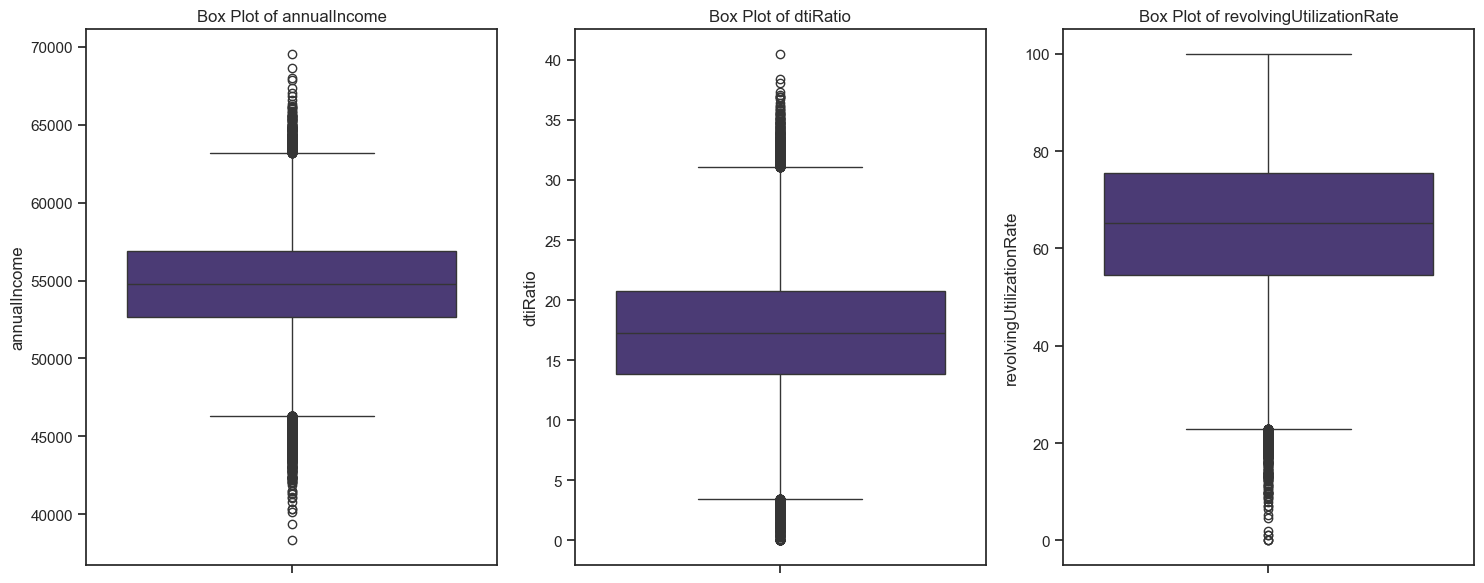

In [34]:

import matplotlib.pyplot as plt
import seaborn as sns

columns_for_boxplots = ['annualIncome', 'dtiRatio', 'revolvingUtilizationRate']

plt.figure(figsize=(15, 6))
for i, col in enumerate(columns_for_boxplots):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

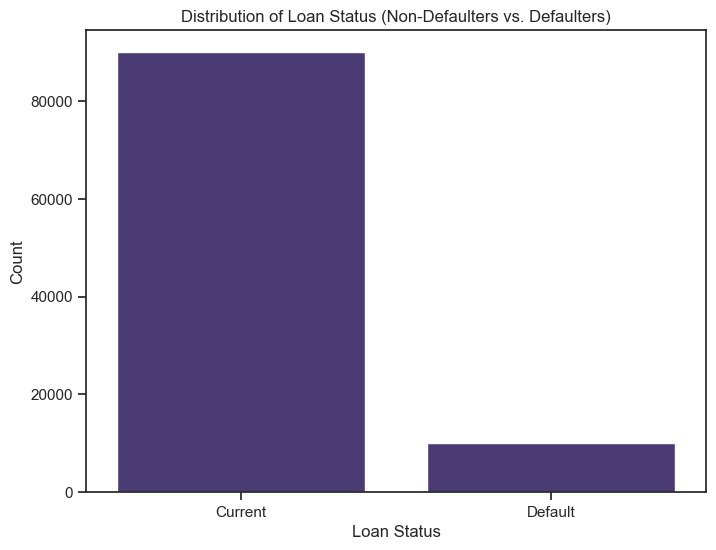

In [35]:

# Plot the distribution of loanStatus
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loanStatus', order=df['loanStatus'].value_counts().index)
plt.title('Distribution of Loan Status (Non-Defaulters vs. Defaulters)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

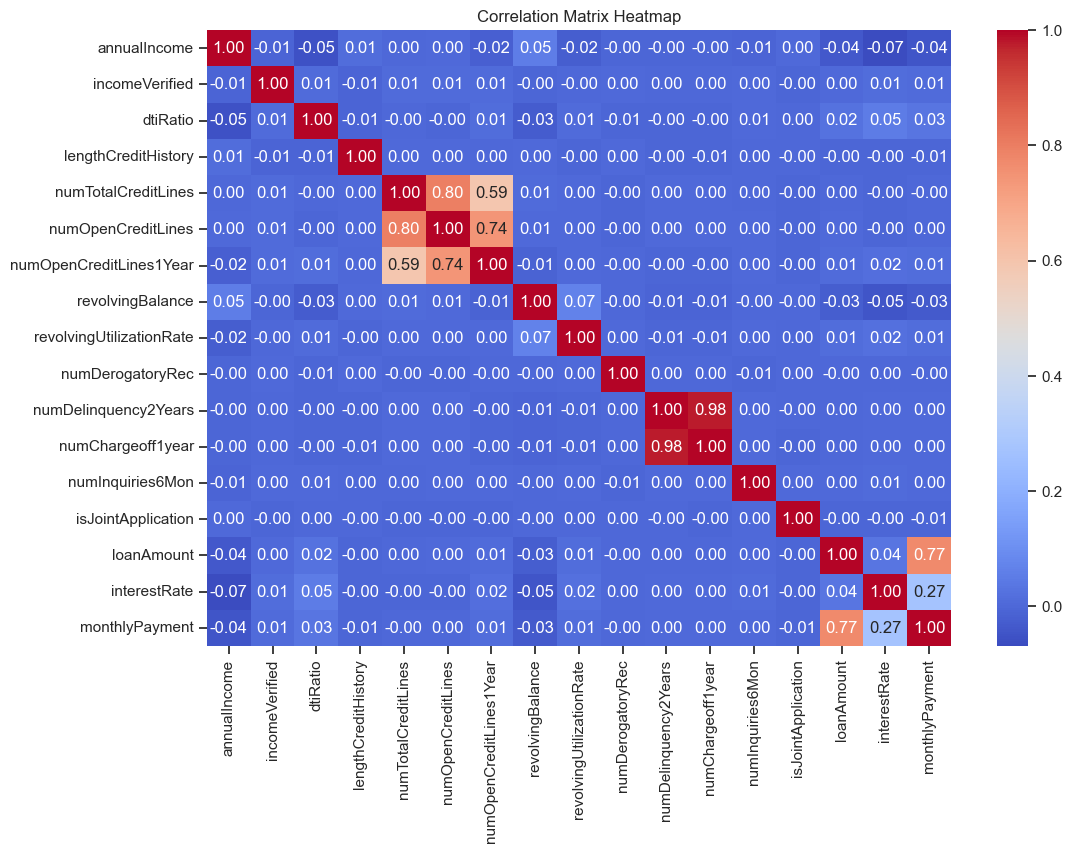

In [37]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
